## 1. Reading and Understanding the Data

### Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



### Loading the data and examining it

In [2]:
Leads = pd.read_csv("Leads.csv")

In [3]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Leads.size

341880

In [5]:
Leads.shape

(9240, 37)

## 2. Data Cleaning

### Dealing with 'Yes','No' and 'Select'

Looking at the data we see there are alot of Yes/No columns that can be converted to 0,1. Apart from this there are a number of values that say 'Select'. The assumption here is that we don't have this data but the users might be able to select a value for them. 
Let us replace 'Select' will Null vales

In [6]:
for x in Leads.columns:
    Leads = Leads.replace({x: {'Yes': 1, 'No': 0, 'Select': np.nan}})

In [7]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## HANDLING MISSING VALUES
### Identifying the percentage of Null values in each column
Here we also sort the data in decending order so that we get the columns with maximum null values at the top. 

In [9]:
Leads.isna().sum().sort_values(ascending=False)/Leads.shape[0] * 100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

Saving the result for all the columns in a variable in order to then extract the column names

In [10]:
temp=Leads.isna().sum().sort_values(ascending=False)/Leads.shape[0] * 100

### Assumption - missing value threshold is decided as 30%
We need to remove the columns with more than 30% null values. To do that we identify the columns that have less than 30% null values. app_acc_cols is a list of all columns with null values less that 30%

In [11]:
ActualColumns=list(temp[temp<30.00].index)

In [12]:
ActualColumns

['What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'Page Views Per Visit',
 'TotalVisits',
 'Last Activity',
 'Lead Source',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'A free copy of Mastering The Interview',
 'Prospect ID',
 'Newspaper Article',
 'Through Recommendations',
 'Digital Advertisement',
 'Newspaper',
 'X Education Forums',
 'Lead Number',
 'Magazine',
 'Search',
 'Total Time Spent on Website',
 'Converted',
 'Do Not Call',
 'Do Not Email',
 'Lead Origin',
 'Last Notable Activity']

In [13]:
len(ActualColumns)

27

Removing 'Prospect ID' and 'Lead Number' as they are not important to the analysis

In [14]:
ActualColumns.remove('Prospect ID')
ActualColumns.remove('Lead Number')
len(ActualColumns)

25

### We are now left with 25 columns after removing the columns with missing values and the other two columns

In [15]:
Leads=Leads[ActualColumns]

In [16]:
Leads.head()

,What matters most to you in choosing a course,What is your current occupation,Country,Page Views Per Visit,TotalVisits,Last Activity,Lead Source,Receive More Updates About Our Courses,I agree to pay the amount through cheque,Get updates on DM Content,...,Newspaper,X Education Forums,Magazine,Search,Total Time Spent on Website,Converted,Do Not Call,Do Not Email,Lead Origin,Last Notable Activity
0,Better Career Prospects,Unemployed,NaN,0.0,0.0,Page Visited on Website,Olark Chat,0,0,0,...,0,0,0,0,0,0,0,0,API,Modified
1,Better Career Prospects,Unemployed,India,2.5,5.0,Email Opened,Organic Search,0,0,0,...,0,0,0,0,674,0,0,0,API,Email Opened
2,Better Career Prospects,Student,India,2.0,2.0,Email Opened,Direct Traffic,0,0,0,...,0,0,0,0,1532,1,0,0,Landing Page Submission,Email Opened
3,Better Career Prospects,Unemployed,India,1.0,1.0,Unreachable,Direct Traffic,0,0,0,...,0,0,0,0,305,0,0,0,Landing Page Submission,Modified
4,Better Career Prospects,Unemployed,India,1.0,2.0,Converted to Lead,Google,0,0,0,...,0,0,0,0,1428,1,0,0,Landing Page Submission,Modified


In [17]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   What matters most to you in choosing a course  6531 non-null   object 
 1   What is your current occupation                6550 non-null   object 
 2   Country                                        6779 non-null   object 
 3   Page Views Per Visit                           9103 non-null   float64
 4   TotalVisits                                    9103 non-null   float64
 5   Last Activity                                  9137 non-null   object 
 6   Lead Source                                    9204 non-null   object 
 7   Receive More Updates About Our Courses         9240 non-null   int64  
 8   I agree to pay the amount through cheque       9240 non-null   int64  
 9   Get updates on DM Content                      9240 

### Checking for unique values

In [18]:
UnqCol=[]
for i in Leads.columns:
    a= " ".join([str(i), str(Leads[i].value_counts().size)])
    UnqCol.append(a)
UnqCol

['What matters most to you in choosing a course 3',
 'What is your current occupation 6',
 'Country 38',
 'Page Views Per Visit 114',
 'TotalVisits 41',
 'Last Activity 17',
 'Lead Source 21',
 'Receive More Updates About Our Courses 1',
 'I agree to pay the amount through cheque 1',
 'Get updates on DM Content 1',
 'Update me on Supply Chain Content 1',
 'A free copy of Mastering The Interview 2',
 'Newspaper Article 2',
 'Through Recommendations 2',
 'Digital Advertisement 2',
 'Newspaper 2',
 'X Education Forums 2',
 'Magazine 1',
 'Search 2',
 'Total Time Spent on Website 1731',
 'Converted 2',
 'Do Not Call 2',
 'Do Not Email 2',
 'Lead Origin 5',
 'Last Notable Activity 16']

In [19]:
Leads['X Education Forums'].value_counts()

0    9239
1       1
Name: X Education Forums, dtype: int64

In [20]:
Leads.Newspaper.value_counts()

0    9239
1       1
Name: Newspaper, dtype: int64

In [21]:
Leads['Newspaper Article'].value_counts()

0    9238
1       2
Name: Newspaper Article, dtype: int64

In [22]:
Leads['Through Recommendations'].value_counts()

0    9233
1       7
Name: Through Recommendations, dtype: int64

In [23]:
Leads['Digital Advertisement'].value_counts()

0    9236
1       4
Name: Digital Advertisement, dtype: int64

In [24]:
Leads['Search'].value_counts()

0    9226
1      14
Name: Search, dtype: int64

In [25]:
Leads['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

In [26]:
Leads['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

We notice that the following columns have only one unique value. Either Yes or No. Also in some cases, the Yes and No ratio is highly skewed. This could be due to unavailability of data for that particular column. These will not matter at all in our analysis, We can remove them

['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Magazine', 'X Education Forums', 'Newspaper', 'Newspaper Article',
        'Through Recommendations', 'Digital Advertisement', 'Do Not Call']

In [27]:
Remove = ['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Get updates on DM Content',
        'Update me on Supply Chain Content', 'Magazine', 'X Education Forums', 'Newspaper', 'Newspaper Article',
        'Through Recommendations', 'Digital Advertisement', 'Do Not Call']

In [28]:
Leads.drop(Remove, axis=1, inplace=True)

In [29]:
Leads['Total Time Spent on Website'].head()

0       0
1     674
2    1532
3     305
4    1428
Name: Total Time Spent on Website, dtype: int64

Converting 'Total Time Spent on Website' to float

In [30]:
Leads['Total Time Spent on Website']=Leads['Total Time Spent on Website'].astype('float64')

In [31]:
Leads.shape

(9240, 14)

### Looking at columns based on Data Types

In [32]:
i64=Leads.dtypes[Leads.dtypes == 'int64'].index
f64=Leads.dtypes[Leads.dtypes == 'float64'].index
obj=Leads.dtypes[Leads.dtypes == 'object'].index

### Integer Columns

In [33]:
Leads[i64]

,A free copy of Mastering The Interview,Search,Converted,Do Not Email
0,0,0,0,0
1,0,0,0,0
2,1,0,1,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
9235,0,0,1,1
9236,1,0,0,0
9237,1,0,0,1
9238,0,0,1,0


In [34]:
Leads[i64].isna().sum().sort_values(ascending=False)/Leads.shape[0] * 100

A free copy of Mastering The Interview    0.0
Search                                    0.0
Converted                                 0.0
Do Not Email                              0.0
dtype: float64

Thus the integer columns look fine with no missing values

### Float Columns

In [35]:
Leads[f64]

,Page Views Per Visit,TotalVisits,Total Time Spent on Website
0,0.00,0.0,0.0
1,2.50,5.0,674.0
2,2.00,2.0,1532.0
3,1.00,1.0,305.0
4,1.00,2.0,1428.0
...,...,...,...
9235,2.67,8.0,1845.0
9236,2.00,2.0,238.0
9237,2.00,2.0,199.0
9238,3.00,3.0,499.0


In [36]:
Leads[f64].isna().sum().sort_values(ascending=False)/Leads.shape[0] * 100

Page Views Per Visit           1.482684
TotalVisits                    1.482684
Total Time Spent on Website    0.000000
dtype: float64

### Imputing missing values with median

For normalised data, the mean and the median are either same or very close. For data that has outlies, the mean is heavily affected. Hence it is safe to impute missing values with mediuan instead of mean. This will give us a good approximation even if a certain column has outliers

In [37]:
for i in f64:
    Leads[i].fillna(Leads[i].median(), inplace=True)

In [38]:
Leads[f64].isna().sum().sort_values(ascending=False)/Leads.shape[0] * 100

Page Views Per Visit           0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
dtype: float64

### Categorical Columns

In [39]:
Leads[obj]

,What matters most to you in choosing a course,What is your current occupation,Country,Last Activity,Lead Source,Lead Origin,Last Notable Activity
0,Better Career Prospects,Unemployed,NaN,Page Visited on Website,Olark Chat,API,Modified
1,Better Career Prospects,Unemployed,India,Email Opened,Organic Search,API,Email Opened
2,Better Career Prospects,Student,India,Email Opened,Direct Traffic,Landing Page Submission,Email Opened
3,Better Career Prospects,Unemployed,India,Unreachable,Direct Traffic,Landing Page Submission,Modified
4,Better Career Prospects,Unemployed,India,Converted to Lead,Google,Landing Page Submission,Modified
...,...,...,...,...,...,...,...
9235,Better Career Prospects,Unemployed,Saudi Arabia,Email Marked Spam,Direct Traffic,Landing Page Submission,Email Marked Spam
9236,Better Career Prospects,Unemployed,India,SMS Sent,Direct Traffic,Landing Page Submission,SMS Sent
9237,Better Career Prospects,Unemployed,India,SMS Sent,Direct Traffic,Landing Page Submission,SMS Sent
9238,NaN,NaN,India,SMS Sent,Google,Landing Page Submission,SMS Sent


In [40]:
Leads[obj].isna().sum().sort_values(ascending=False)/Leads.shape[0] * 100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
dtype: float64

#### Lets check the value counts for each values in the country column

In [41]:
Leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Check the percentage of India as value in the country column

In [42]:
country_percentage = round(100*len(Leads[Leads['Country'] == 'India'])/len(Leads['Country']),2)
print(country_percentage)

70.26


Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, we shall go ahead and drop the column

In [43]:
Leads = Leads.drop(['Country'], axis=1)

#### Lets check the value counts for each values in the Lead Source column

In [44]:
Leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value "Google" to the same case. Also since "Google" has majority data, we impute the null values with Google

In [45]:
Leads['Lead Source'] = Leads['Lead Source'].replace('google', 'Google')
Leads['Lead Source'] = Leads['Lead Source'].replace(np.nan, 'Google')

#### Lets check the value counts for each values in the 'What matters most to you in choosing a course' column

In [46]:
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Since "Better Career Prospects" occurs around 70% of times in the 'What matters most to you in choosing a course' column, and this column also has around 29% as missing values - 
We shall go ahead and drop the column

In [47]:
Leads = Leads.drop(['What matters most to you in choosing a course'], axis=1)

#### Lets check the value counts for each values in the 'What is your current occupation' column

In [48]:
Leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
Unemployed_Occupation = round(100*len(Leads[Leads['What is your current occupation'] 
                            == 'Unemployed'])/len(Leads['What is your current occupation']),2)
print(Unemployed_Occupation)

60.61


Since "Unemployed" occurs around 60% of times in the What is your current occupation' column, and this column also has around 29% as missing values - 
We shall go ahead and drop the column

In [50]:
Leads = Leads.drop(['What is your current occupation'], axis=1)

#### Lets check the value counts for each values in the 'Last Activity' column

In [51]:
Leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Imputing the unknown with the mode

In [52]:
Leads['Last Activity'].fillna(Leads['Last Activity'].mode()[0], inplace=True)

In [53]:
# Redefining types of columns again

i64=Leads.dtypes[Leads.dtypes == 'int64'].index
f64=Leads.dtypes[Leads.dtypes == 'float64'].index
obj=Leads.dtypes[Leads.dtypes == 'object'].index

In [54]:
Leads[obj].isna().sum().sort_values(ascending=False)/Leads.shape[0] * 100

Last Activity            0.0
Lead Source              0.0
Lead Origin              0.0
Last Notable Activity    0.0
dtype: float64

### Outlier Analysis of float columns

In [55]:
def cat_plot_box(df,x,ncol,fw,fh):
    a=len(x)
    if a%2==0:
        nrows=int((a/ncol))
    else:
        nrows=int((a/ncol)+1)
    v=[]
    for i in range(nrows):
        for j in range(ncol):
            v.append((i,j))
    fig, axis = plt.subplots(nrows, ncol, figsize=(fw, fh))
    for i in range(a):
        sns.boxplot(ax=axis[v[i]],x=df[x[i]])
        axis[v[i]].set_title(x[i])

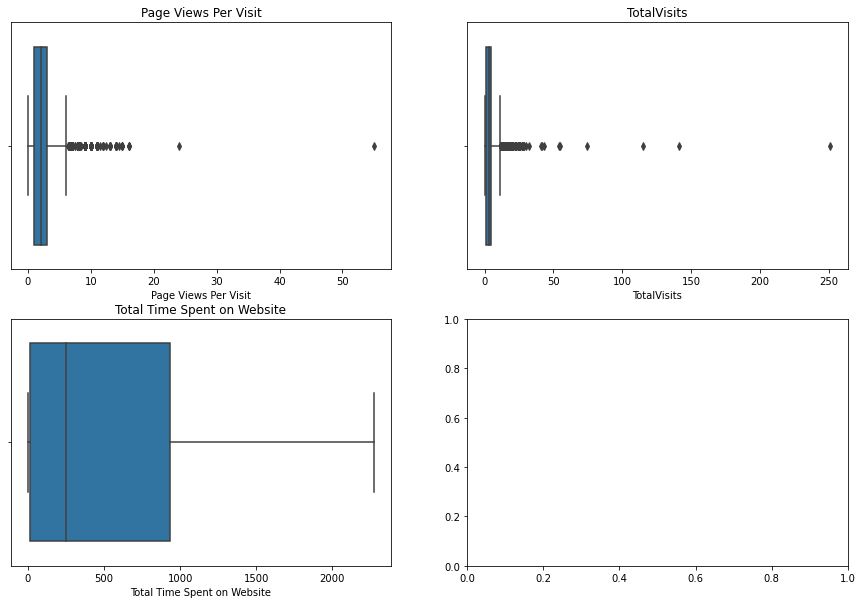

In [56]:
cat_plot_box(Leads, f64, 2, 15, 10)

In [57]:
Leads[f64].describe()

,Page Views Per Visit,TotalVisits,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,2.357440,3.438636,487.698268
std,2.145781,4.819024,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,2.000000,3.000000,248.000000
75%,3.000000,5.000000,936.000000
max,55.000000,251.000000,2272.000000


#### Cleaning Outliers
As we know we now need to clean the outliers for better results

In [58]:
def clean_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR=q3-q1
    ul = q3+1.5*IQR
    ll = q1-1.5*IQR
    x[x>ul]=ul
    x[x<ll]=ll 

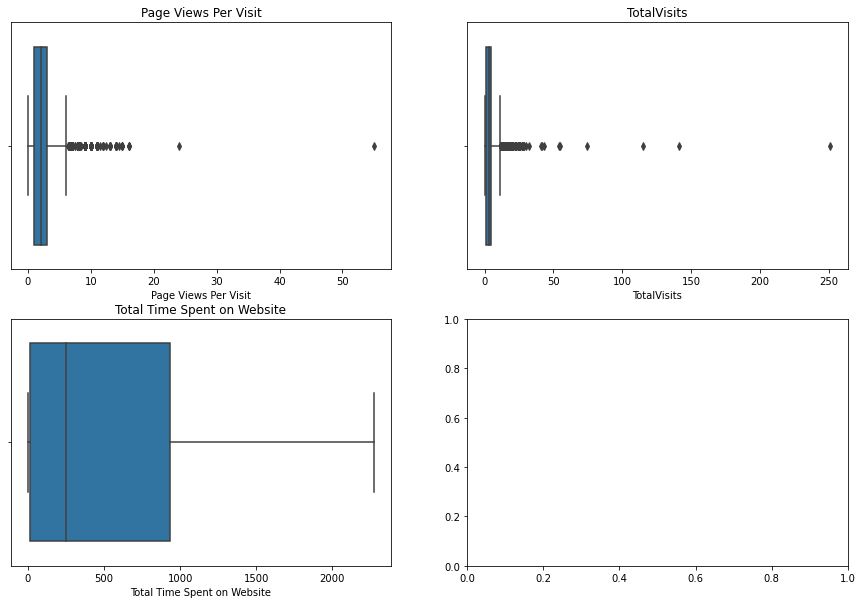

In [59]:
cat_plot_box(Leads,f64,2,15,10)

In [60]:
for i in f64:
    clean_outliers(Leads[i])

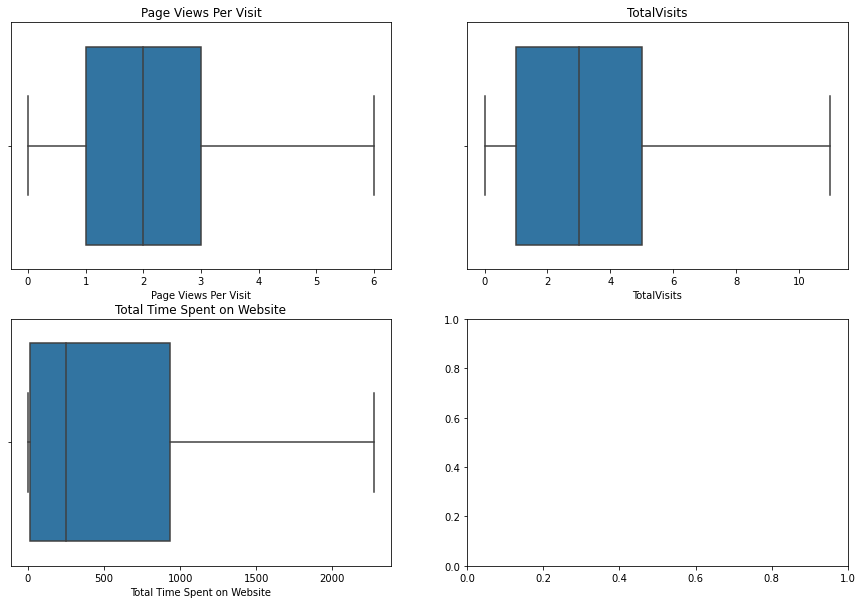

In [61]:
cat_plot_box(Leads,f64,2,15,10)

## 3. Exploratory Data Analysis

Looking at the balance of the data

<AxesSubplot:xlabel='Converted', ylabel='count'>

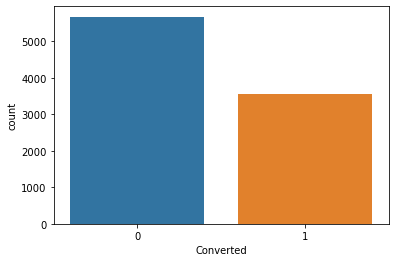

In [62]:
sns.countplot(Leads['Converted'])

In [63]:
def cat_plot_box_target(df,x,ncol,fw,fh):
    a=len(x)
    if a%2==0:
        nrows=int((a/ncol))
    else:
        nrows=int((a/ncol)+1)
    v=[]
    for i in range(nrows):
        for j in range(ncol):
            v.append((i,j))
    fig, axis = plt.subplots(nrows, ncol, figsize=(fw, fh))
    for i in range(a):
        sns.boxplot(data=df,ax=axis[v[i]], x='Converted', y=x[i])
        axis[v[i]].set_title(x[i])

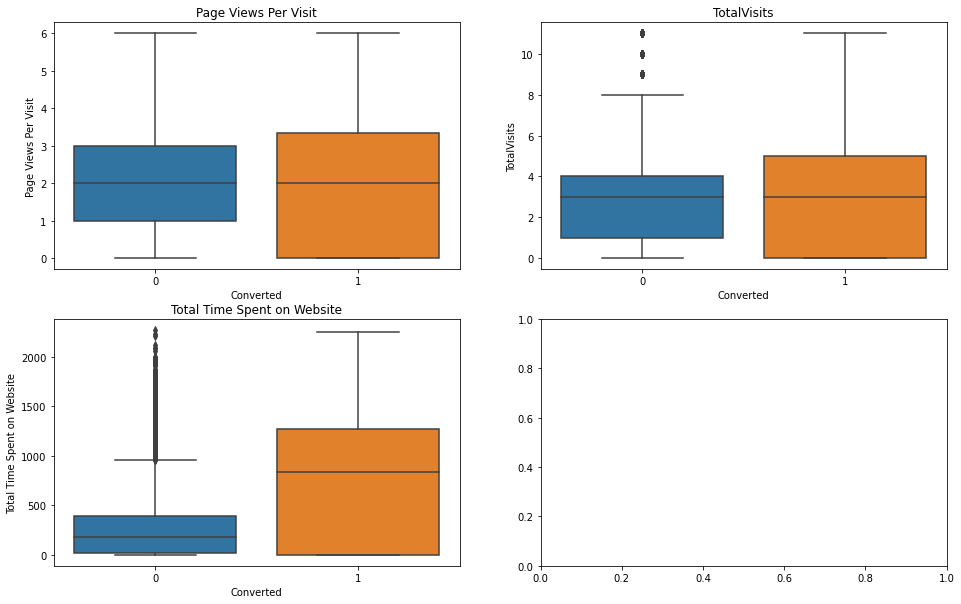

In [64]:
cat_plot_box_target(Leads,f64,2,16,10)

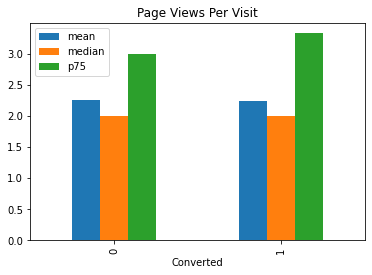

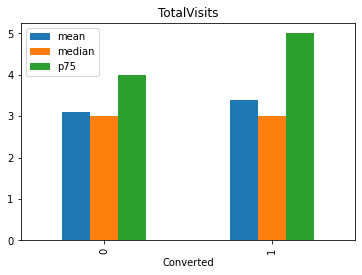

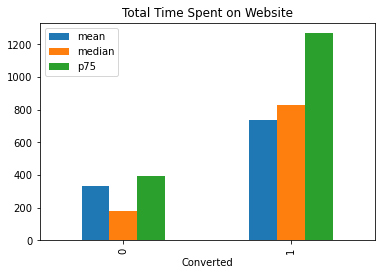

In [65]:
def p75(x):
    return np.quantile(x,0.75)
for i in f64:
    Leads.groupby('Converted')[i].aggregate(['mean','median', p75]).plot.bar()
    plt.title(i)

#### Analysis:
Looking at the visualization, we can clearly see that 'Total Time Spent on Website' is directly impacting conversions. More time the users spend on the Website, the higher is the conversion rate
#### Suggestion
It would be great if X Education could improve their website to increase total time spent

### Analysis of Categorical Columns

Creating a dataframe of successful Conversions

In [66]:
ConvertedLeads=Leads[Leads.Converted == 1]

In [67]:
def cat_plot(df,x,ncol,fw,fh):
    a=len(x)
    if a%2==0:
        nrows=int((a/ncol))
    else:
        nrows=int((a/ncol)+1)
    v=[]
    for i in range(nrows):
        for j in range(ncol):
            v.append((i,j))
    fig, axis = plt.subplots(nrows, ncol, figsize=(fw, fh))
    for i in range(a):
        A=list(df[x[i]].value_counts(ascending=False).head(9).index)
        B=list(df[x[i]].value_counts(ascending=False).head(9))
        axis[v[i]].barh(A,B)
        axis[v[i]].tick_params(axis='x', labelrotation = 100)
        axis[v[i]].set_title(x[i])

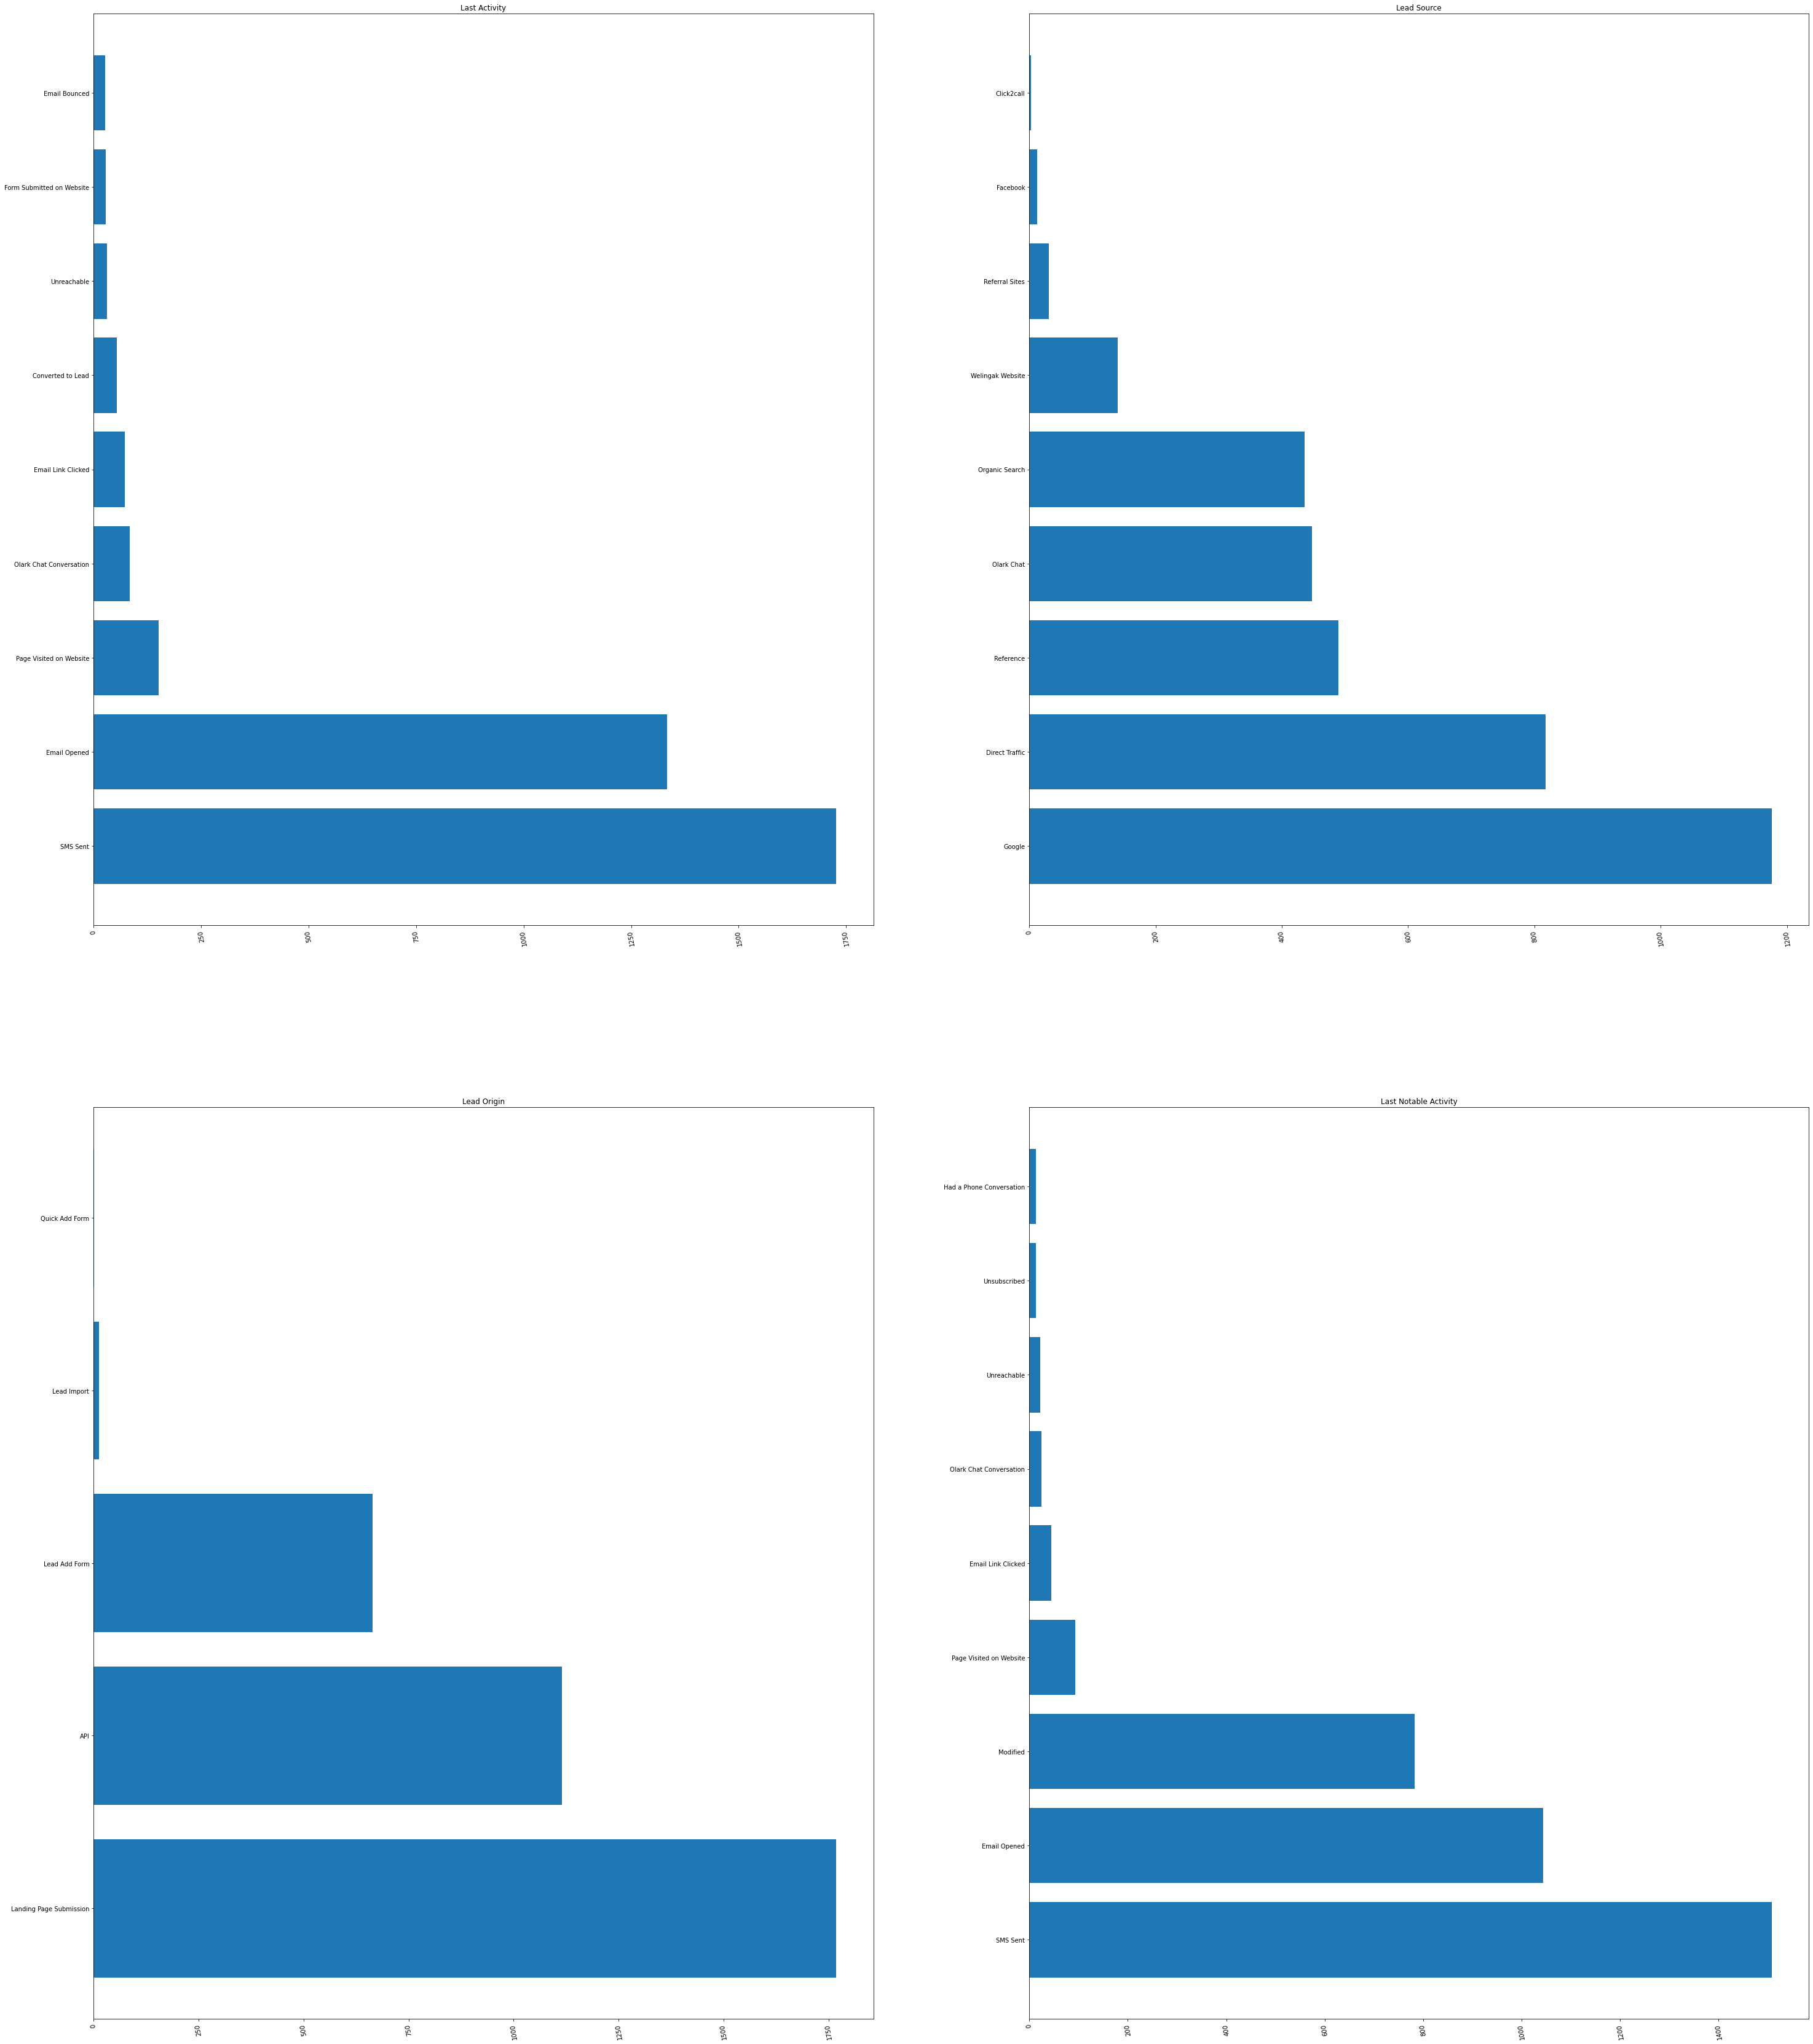

In [68]:
cat_plot(ConvertedLeads,obj,2,50,60)

### Simplifying categories in columns

As we see most of the data is split in 4-5 categories for all columns. It would be better if we remove all extra columns by just piling them together as 'Others'. This will help us get the top 5 categories for all columns always

In [69]:
for i in obj:
    if len(Leads[i].unique()) > 4:
        topcats = list(Leads[i].value_counts(ascending=False).head(4).index)
        Leads[i]=Leads[i].apply(lambda x: x if x in topcats else 'Others')

In [70]:
ConvertedLeads=Leads[Leads.Converted == 1]

In [71]:
UnqCol=[]
for i in obj:
    a= " ".join([str(i), str(Leads[i].value_counts().size)])
    UnqCol.append(a)
UnqCol

['Last Activity 5',
 'Lead Source 5',
 'Lead Origin 5',
 'Last Notable Activity 5']

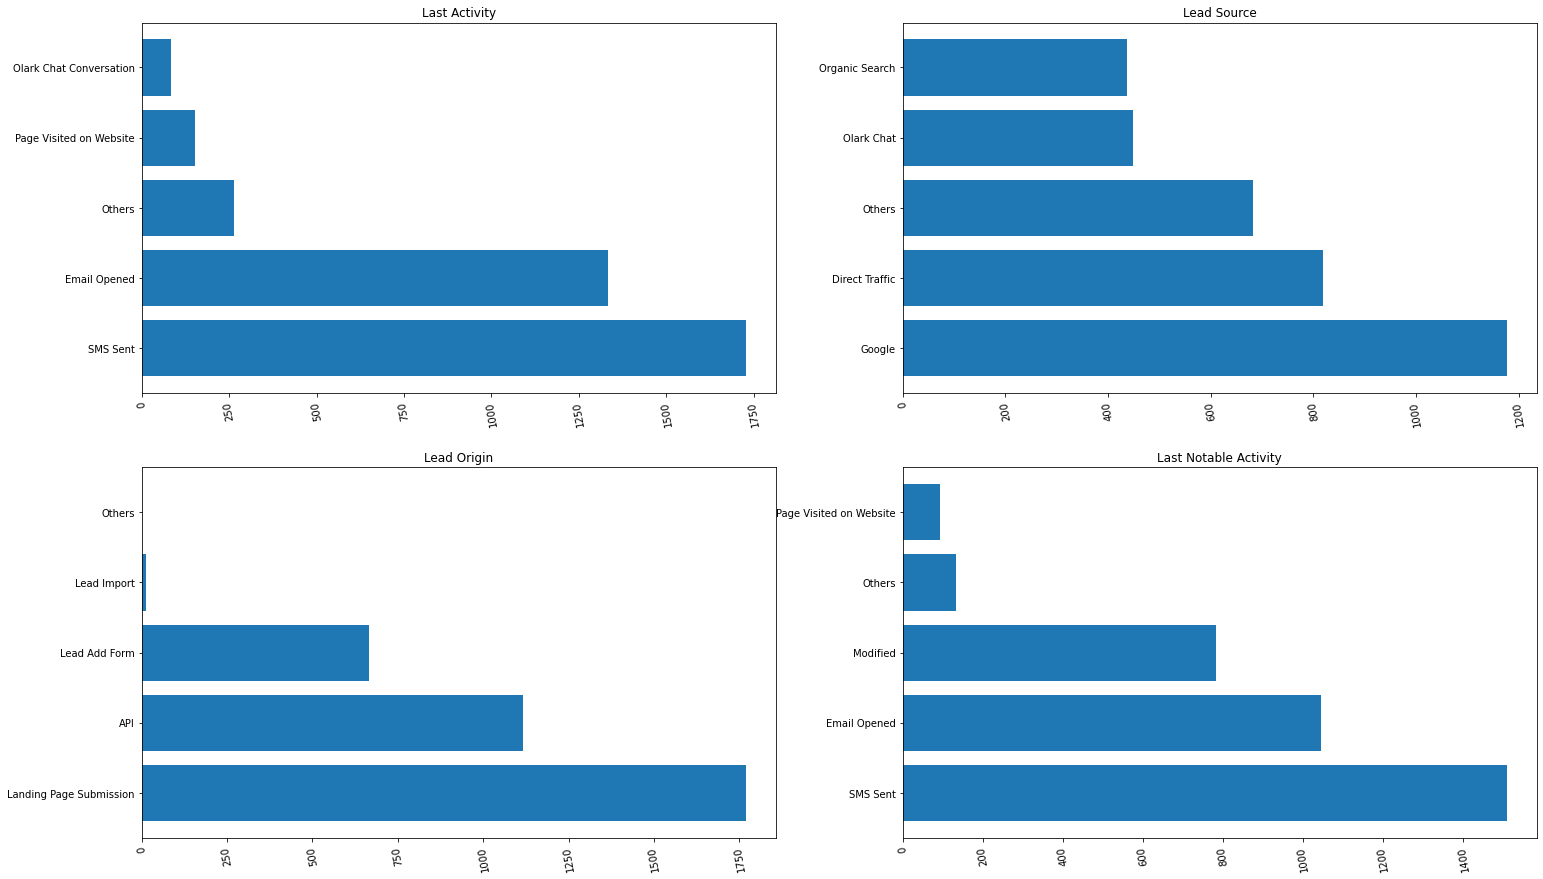

In [72]:
cat_plot(ConvertedLeads,obj,2,25,15)

#### Analysis:
Looking at the visualizations, we can infer that Conversion rate is high when :
- The last activity is 'SMS sent'
- The lead origin is from comes from Landing Page Submission
- The lead source is Google

### Analysis of Yes/No Columns

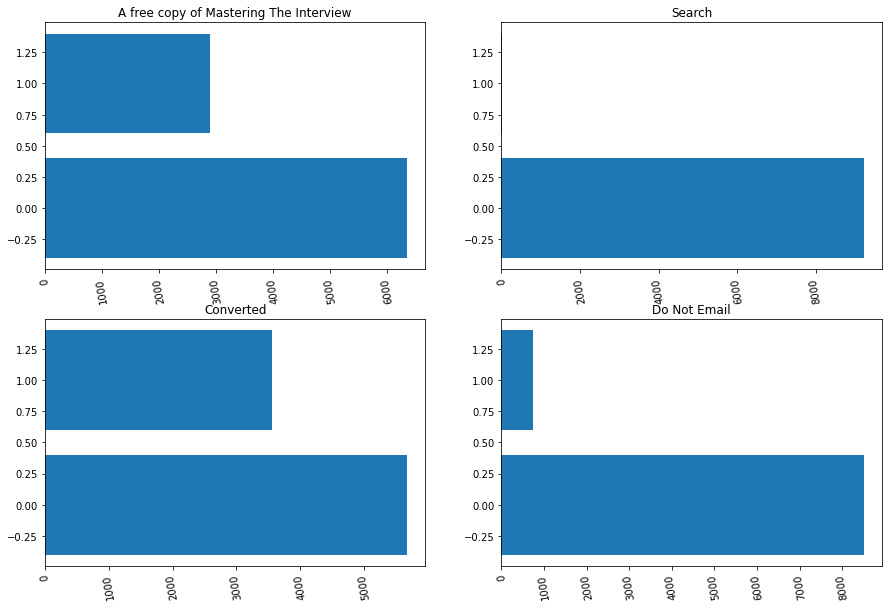

In [73]:
cat_plot(Leads,i64,2,15,10)

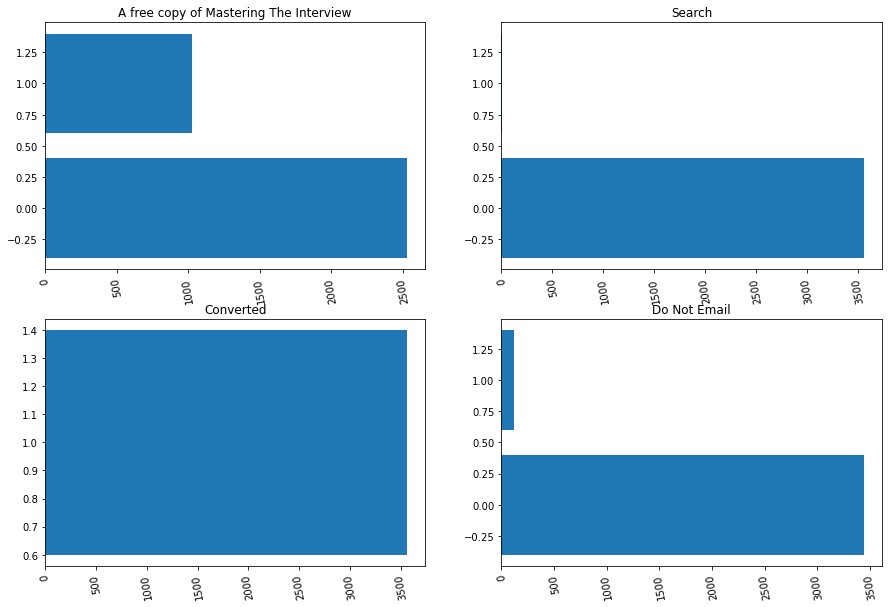

In [74]:
cat_plot(ConvertedLeads,i64,2,15,10)

#### Analysis:
Looking at the visualization, the only suggestion that comes to mind is that 'A Free Copy of Mastering the Interview' is a good marketing technique if worked on a bit more

## 4. Preparing Data for Regression

In [75]:
# Resetting the values just to be safe
i64=Leads.dtypes[Leads.dtypes == 'int64'].index
f64=Leads.dtypes[Leads.dtypes == 'float64'].index
obj=Leads.dtypes[Leads.dtypes == 'object'].index

### Creating Dummy Variables

In [76]:
Leads.shape

(9240, 11)

In [77]:
Leads.columns

Index(['Page Views Per Visit', 'TotalVisits', 'Last Activity', 'Lead Source',
       'A free copy of Mastering The Interview', 'Search',
       'Total Time Spent on Website', 'Converted', 'Do Not Email',
       'Lead Origin', 'Last Notable Activity'],
      dtype='object')

In [78]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads[obj], drop_first=True)

# Adding the results to the master dataframe
Leads = pd.concat([Leads, dummy1], axis=1)

#Dropping the original columns
Leads = Leads.drop(obj, 1)

In [79]:
Leads.shape

(9240, 23)

### Test - Train Split

#### Splitting the Target Variable

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Putting feature variable to X
X = Leads.drop('Converted', axis=1)

X.head()

,Page Views Per Visit,TotalVisits,A free copy of Mastering The Interview,Search,Total Time Spent on Website,Do Not Email,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,...,Lead Source_Organic Search,Lead Source_Others,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2.5,5.0,0,0,674.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1,0,1532.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1.0,0,0,305.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1.0,2.0,0,0,1428.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [82]:
y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Splitting the data into train and test

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features

As we can see values in some columns are quite high. These will not be easy to interpret, hence it is better to scale them. We will use Standard Scaling for this purpose:

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

X_train[f64] = scaler.fit_transform(X_train[f64])
X_test[f64] = scaler.transform(X_test[f64])

X_train.head()

,Page Views Per Visit,TotalVisits,A free copy of Mastering The Interview,Search,Total Time Spent on Website,Do Not Email,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,...,Lead Source_Organic Search,Lead Source_Others,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0.000000,0.000000,0,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.221667,0.363636,1,0,0.214349,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3516,0.416667,0.454545,0,0,0.046655,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.833333,0.454545,0,0,0.541373,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3934,0.000000,0.000000,0,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
Conversion = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Conversion

38.53896103896104

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Page Views Per Visit                           6468 non-null   float64
 1   TotalVisits                                    6468 non-null   float64
 2   A free copy of Mastering The Interview         6468 non-null   int64  
 3   Search                                         6468 non-null   int64  
 4   Total Time Spent on Website                    6468 non-null   float64
 5   Do Not Email                                   6468 non-null   int64  
 6   Last Activity_Olark Chat Conversation          6468 non-null   uint8  
 7   Last Activity_Others                           6468 non-null   uint8  
 8   Last Activity_Page Visited on Website          6468 non-null   uint8  
 9   Last Activity_SMS Sent                         64

## 5. Modelling

### First Model

In [88]:
import statsmodels.api as sm

In [89]:
# Logistic regression model
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.1
Date:                Sun, 05 Mar 2023   Deviance:                       5692.2
Time:                        19:48:15   Pearson chi2:                 6.65e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3619
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.1892      0.147    -14.914      0.000      -2.477      -1.901
Page Views Per Visit                             -0.9486      0.196     -4.836      0.000      -1.333      -0.564
TotalVisits                                       1.3110      0.198      6.622      0.000       0.923       1.699
A free copy of Mastering The Interview           -0.0609      0.101     -0.603      0.546      -0.259       0.137
Search                                            0.2530      0.695      0.364      0.716      -1.109       1.615
Total Time Spent on Website                       4.5836      0.161     28.535      0.000       4.269       4.898
Do Not Email                                     -1.2032      0.168     -7.147      0.000      -1.533      -0.873
Last Activity_Olark Chat Conversation            -1.5039      0.205     -7.350      0.000      -1.905      -1.103
Last Activity_Others                             -0.5459      0.172     -3.166      0.002      -0.884      -0.208
Last Activity_Page Visited on Website            -0.6683      0.239     -2.800      0.005      -1.136      -0.200
Last Activity_SMS Sent                            0.3668      0.174      2.107      0.035       0.026       0.708
Lead Source_Google                                0.3293      0.108      3.040      0.002       0.117       0.542
Lead Source_Olark Chat                            1.1928      0.156      7.653      0.000       0.887       1.498
Lead Source_Organic Search                        0.1222      0.124      0.984      0.325      -0.121       0.366
Lead Source_Others                                0.3679      0.254      1.449      0.147      -0.130       0.866
Lead Origin_Landing Page Submission              -0.0445      0.102     -0.437      0.662      -0.244       0.155
Lead Origin_Lead Add Form                         3.8290      0.291     13.174      0.000       3.259       4.399
Lead Origin_Lead Import                          -0.2730      0.560     -0.488      0.626      -1.370       0.824
Lead Origin_Others                               20.0218   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Modified                   -0.3608      0.133     -2.716      0.007      -0.621      -0.100
Last Notable Activity_Others                      0.5636      0.223      2.529      0.011       0.127       1.000
Last Notable Activity_Page Visited on Website     0.0649      0.302      0.215      0.830      -0.526       0.656
Last Notable Activity_SMS Sent                    1.0241      0.193      5.309      0.000       0.646       1.402
=================================================================================================================
"""

As we see there are too many columns to deal with, Let's automate this initial selection using RFE

## 6. Feature Selection Using RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg , n_features_to_select=18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True])

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Page Views Per Visit', True, 1),
 ('TotalVisits', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Search', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Do Not Email', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Others', True, 1),
 ('Last Notable Activity_Page Visited on Website', False, 5),
 ('Last Notable Activity_SMS Sent', True, 1)]

#### Storing the selected columns

In [94]:
col1 = X_train.columns[rfe.support_]

In [95]:
col1

Index(['Page Views Per Visit', 'TotalVisits', 'Search',
       'Total Time Spent on Website', 'Do Not Email',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

## 7. Modeling with the selected features

### Model 1

In [96]:
X_train_sm = sm.add_constant(X_train[col1])
logm01 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm01.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.5
Date:                Sun, 05 Mar 2023   Deviance:                       5695.0
Time:                        19:48:15   Pearson chi2:                 6.65e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3617
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2383      0.119    -18.790      0.000      -2.472      -2.005
Page Views Per Visit                     -0.9468      0.189     -5.016      0.000      -1.317      -0.577
TotalVisits                               1.3327      0.194      6.879      0.000       0.953       1.712
Search                                    0.2656      0.691      0.384      0.701      -1.090       1.621
Total Time Spent on Website               4.5793      0.161     28.524      0.000       4.265       4.894
Do Not Email                             -1.2050      0.168     -7.171      0.000      -1.534      -0.876
Last Activity_Olark Chat Conversation    -1.4811      0.199     -7.439      0.000      -1.871      -1.091
Last Activity_Others                     -0.5331      0.165     -3.227      0.001      -0.857      -0.209
Last Activity_Page Visited on Website    -0.6333      0.150     -4.211      0.000      -0.928      -0.339
Last Activity_SMS Sent                    0.3736      0.167      2.236      0.025       0.046       0.701
Lead Source_Google                        0.3375      0.077      4.382      0.000       0.187       0.488
Lead Source_Olark Chat                    1.2385      0.132      9.410      0.000       0.981       1.496
Lead Source_Others                        0.3799      0.240      1.581      0.114      -0.091       0.851
Lead Origin_Lead Add Form                 3.8664      0.290     13.340      0.000       3.298       4.434
Lead Origin_Lead Import                  -0.2348      0.559     -0.420      0.675      -1.331       0.861
Lead Origin_Others                       20.0580   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Modified           -0.3692      0.120     -3.089      0.002      -0.603      -0.135
Last Notable Activity_Others              0.5483      0.215      2.554      0.011       0.128       0.969
Last Notable Activity_SMS Sent            1.0160      0.184      5.516      0.000       0.655       1.377
=========================================================================================================
"""

In [97]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.268978,1871,0
1,0,0.272488,6795,0
2,0,0.360102,3516,0
3,0,0.856264,8105,1
4,0,0.202775,3934,0
5,1,0.912745,4844,1
6,0,0.145385,3297,0
7,1,0.863034,8071,1
8,0,0.239618,987,0
9,1,0.940799,7423,1


### Lets look at some metrics

In [98]:
from sklearn import metrics

In [99]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3515  487]
 [ 791 1675]]


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8024118738404453


In [101]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,8.06
17,Last Notable Activity_SMS Sent,7.85
0,Page Views Per Visit,6.28
1,TotalVisits,5.55
11,Lead Source_Others,4.94
12,Lead Origin_Lead Add Form,4.75
15,Last Notable Activity_Modified,4.71
6,Last Activity_Others,2.97
5,Last Activity_Olark Chat Conversation,2.44
3,Total Time Spent on Website,2.10


#### Dropping column

We need to drop the following columns for having a high p value - 'Lead Origin_Others'

In [103]:
droplist='Lead Origin_Others'

In [104]:
col2 = col1.drop(droplist, 1)

### Model 2

In [105]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col2])
logm02 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm02.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.0
Date:                Sun, 05 Mar 2023   Deviance:                       5695.9
Time:                        19:48:15   Pearson chi2:                 6.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3616
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2402      0.119    -18.807      0.000      -2.474      -2.007
Page Views Per Visit                     -0.9481      0.189     -5.022      0.000      -1.318      -0.578
TotalVisits                               1.3332      0.194      6.880      0.000       0.953       1.713
Search                                    0.2664      0.692      0.385      0.700      -1.089       1.622
Total Time Spent on Website               4.5851      0.160     28.583      0.000       4.271       4.900
Do Not Email                             -1.1962      0.167     -7.148      0.000      -1.524      -0.868
Last Activity_Olark Chat Conversation    -1.4798      0.199     -7.433      0.000      -1.870      -1.090
Last Activity_Others                     -0.5293      0.165     -3.207      0.001      -0.853      -0.206
Last Activity_Page Visited on Website    -0.6342      0.150     -4.217      0.000      -0.929      -0.339
Last Activity_SMS Sent                    0.3732      0.167      2.233      0.026       0.046       0.701
Lead Source_Google                        0.3388      0.077      4.400      0.000       0.188       0.490
Lead Source_Olark Chat                    1.2401      0.132      9.423      0.000       0.982       1.498
Lead Source_Others                        0.3807      0.240      1.585      0.113      -0.090       0.852
Lead Origin_Lead Add Form                 3.8663      0.290     13.338      0.000       3.298       4.434
Lead Origin_Lead Import                  -0.2342      0.559     -0.419      0.675      -1.330       0.862
Last Notable Activity_Modified           -0.3694      0.120     -3.090      0.002      -0.604      -0.135
Last Notable Activity_Others              0.5436      0.215      2.533      0.011       0.123       0.964
Last Notable Activity_SMS Sent            1.0163      0.184      5.516      0.000       0.655       1.377
=========================================================================================================
"""

In [106]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.268921,1871,0
1,0,0.272336,6795,0
2,0,0.360023,3516,0
3,0,0.856459,8105,1
4,0,0.202693,3934,0
5,1,0.912869,4844,1
6,0,0.145120,3297,0
7,1,0.863381,8071,1
8,0,0.240420,987,0
9,1,0.940972,7423,1


In [107]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8025664811379097


In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,8.06
16,Last Notable Activity_SMS Sent,7.85
0,Page Views Per Visit,6.27
1,TotalVisits,5.55
11,Lead Source_Others,4.94
12,Lead Origin_Lead Add Form,4.75
14,Last Notable Activity_Modified,4.71
6,Last Activity_Others,2.97
5,Last Activity_Olark Chat Conversation,2.44
3,Total Time Spent on Website,2.10


#### Dropping column

We need to drop the following columns for having a high p value - 'Search'

In [109]:
col3 = col2.drop('Search', 1)

### Model 3

In [110]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col3])
logm03 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm03.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.0
Date:                Sun, 05 Mar 2023   Deviance:                       5696.1
Time:                        19:48:16   Pearson chi2:                 6.65e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3615
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2402      0.119    -18.808      0.000      -2.474      -2.007
Page Views Per Visit                     -0.9494      0.189     -5.030      0.000      -1.319      -0.579
TotalVisits                               1.3389      0.193      6.930      0.000       0.960       1.718
Total Time Spent on Website               4.5849      0.160     28.582      0.000       4.271       4.899
Do Not Email                             -1.1968      0.167     -7.151      0.000      -1.525      -0.869
Last Activity_Olark Chat Conversation    -1.4802      0.199     -7.435      0.000      -1.870      -1.090
Last Activity_Others                     -0.5294      0.165     -3.207      0.001      -0.853      -0.206
Last Activity_Page Visited on Website    -0.6340      0.150     -4.216      0.000      -0.929      -0.339
Last Activity_SMS Sent                    0.3738      0.167      2.236      0.025       0.046       0.701
Lead Source_Google                        0.3376      0.077      4.388      0.000       0.187       0.488
Lead Source_Olark Chat                    1.2407      0.132      9.429      0.000       0.983       1.499
Lead Source_Others                        0.3790      0.240      1.578      0.115      -0.092       0.850
Lead Origin_Lead Add Form                 3.8681      0.290     13.346      0.000       3.300       4.436
Lead Origin_Lead Import                  -0.2331      0.559     -0.417      0.677      -1.329       0.863
Last Notable Activity_Modified           -0.3698      0.120     -3.093      0.002      -0.604      -0.135
Last Notable Activity_Others              0.5428      0.215      2.530      0.011       0.122       0.963
Last Notable Activity_SMS Sent            1.0149      0.184      5.510      0.000       0.654       1.376
=========================================================================================================
"""

In [111]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.269051,1871,0
1,0,0.272697,6795,0
2,0,0.360651,3516,0
3,0,0.856380,8105,1
4,0,0.202750,3934,0
5,1,0.912926,4844,1
6,0,0.145487,3297,0
7,1,0.863483,8071,1
8,0,0.240089,987,0
9,1,0.940919,7423,1


In [112]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8024118738404453


In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,8.06
15,Last Notable Activity_SMS Sent,7.85
0,Page Views Per Visit,6.27
1,TotalVisits,5.51
10,Lead Source_Others,4.94
11,Lead Origin_Lead Add Form,4.75
13,Last Notable Activity_Modified,4.71
5,Last Activity_Others,2.97
4,Last Activity_Olark Chat Conversation,2.44
2,Total Time Spent on Website,2.10


#### Dropping column

We need to drop the following columns for having a high p value - 'Lead Origin_Lead Import'

In [114]:
col4 = col3.drop('Lead Origin_Lead Import', 1)

### Model 4

In [115]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col4])
logm04 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm04.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.1
Date:                Sun, 05 Mar 2023   Deviance:                       5696.2
Time:                        19:48:16   Pearson chi2:                 6.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3615
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2450      0.119    -18.934      0.000      -2.477      -2.013
Page Views Per Visit                     -0.9439      0.188     -5.012      0.000      -1.313      -0.575
TotalVisits                               1.3418      0.193      6.948      0.000       0.963       1.720
Total Time Spent on Website               4.5871      0.160     28.606      0.000       4.273       4.901
Do Not Email                             -1.1978      0.167     -7.155      0.000      -1.526      -0.870
Last Activity_Olark Chat Conversation    -1.4759      0.199     -7.422      0.000      -1.866      -1.086
Last Activity_Others                     -0.5245      0.165     -3.185      0.001      -0.847      -0.202
Last Activity_Page Visited on Website    -0.6321      0.150     -4.204      0.000      -0.927      -0.337
Last Activity_SMS Sent                    0.3743      0.167      2.239      0.025       0.047       0.702
Lead Source_Google                        0.3375      0.077      4.386      0.000       0.187       0.488
Lead Source_Olark Chat                    1.2451      0.131      9.490      0.000       0.988       1.502
Lead Source_Others                        0.3375      0.220      1.534      0.125      -0.094       0.769
Lead Origin_Lead Add Form                 3.9118      0.271     14.416      0.000       3.380       4.444
Last Notable Activity_Modified           -0.3724      0.119     -3.119      0.002      -0.606      -0.138
Last Notable Activity_Others              0.5395      0.214      2.516      0.012       0.119       0.960
Last Notable Activity_SMS Sent            1.0146      0.184      5.509      0.000       0.654       1.376
=========================================================================================================
"""

In [116]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.268958,1871,0
1,0,0.272287,6795,0
2,0,0.361401,3516,0
3,0,0.856690,8105,1
4,0,0.202251,3934,0
5,1,0.912910,4844,1
6,0,0.145529,3297,0
7,1,0.863802,8071,1
8,0,0.232498,987,0
9,1,0.940867,7423,1


In [117]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8022572665429808


In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,8.06
14,Last Notable Activity_SMS Sent,7.85
0,Page Views Per Visit,6.26
1,TotalVisits,5.51
12,Last Notable Activity_Modified,4.69
11,Lead Origin_Lead Add Form,4.03
10,Lead Source_Others,4.00
5,Last Activity_Others,2.96
4,Last Activity_Olark Chat Conversation,2.43
2,Total Time Spent on Website,2.10


#### Dropping column

We need to drop the following columns for having a high p value - 'Lead Source_Others'

In [119]:
col5 = col4.drop('Lead Source_Others', 1)

### Model 5

In [120]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col5])
logm05 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm05.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.3
Date:                Sun, 05 Mar 2023   Deviance:                       5698.5
Time:                        19:48:16   Pearson chi2:                 6.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3613
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2187      0.117    -18.913      0.000      -2.449      -1.989
Page Views Per Visit                     -0.9528      0.188     -5.060      0.000      -1.322      -0.584
TotalVisits                               1.3448      0.193      6.961      0.000       0.966       1.723
Total Time Spent on Website               4.5771      0.160     28.586      0.000       4.263       4.891
Do Not Email                             -1.2086      0.168     -7.212      0.000      -1.537      -0.880
Last Activity_Olark Chat Conversation    -1.4789      0.199     -7.433      0.000      -1.869      -1.089
Last Activity_Others                     -0.5313      0.165     -3.228      0.001      -0.854      -0.209
Last Activity_Page Visited on Website    -0.6345      0.150     -4.223      0.000      -0.929      -0.340
Last Activity_SMS Sent                    0.3661      0.167      2.192      0.028       0.039       0.693
Lead Source_Google                        0.3165      0.076      4.185      0.000       0.168       0.465
Lead Source_Olark Chat                    1.2190      0.130      9.374      0.000       0.964       1.474
Lead Origin_Lead Add Form                 4.2058      0.195     21.609      0.000       3.824       4.587
Last Notable Activity_Modified           -0.3639      0.119     -3.051      0.002      -0.598      -0.130
Last Notable Activity_Others              0.5494      0.214      2.562      0.010       0.129       0.970
Last Notable Activity_SMS Sent            1.0163      0.184      5.520      0.000       0.655       1.377
=========================================================================================================
"""

In [121]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8022572665429808


In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,8.05
13,Last Notable Activity_SMS Sent,7.84
0,Page Views Per Visit,6.26
1,TotalVisits,5.50
11,Last Notable Activity_Modified,4.66
5,Last Activity_Others,2.96
4,Last Activity_Olark Chat Conversation,2.43
2,Total Time Spent on Website,2.10
12,Last Notable Activity_Others,2.00
8,Lead Source_Google,1.60


#### Dropping column

We need to drop the following columns for having a high VIF value - 'Last Activity_SMS Sent'

In [123]:
col6 = col5.drop('Last Activity_SMS Sent', 1)

### Model 6

In [124]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col6])
logm06 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm06.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.7
Date:                Sun, 05 Mar 2023   Deviance:                       5703.3
Time:                        19:48:16   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3608
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2114      0.117    -18.866      0.000      -2.441      -1.982
Page Views Per Visit                     -0.9596      0.188     -5.099      0.000      -1.329      -0.591
TotalVisits                               1.3572      0.193      7.034      0.000       0.979       1.735
Total Time Spent on Website               4.5742      0.160     28.586      0.000       4.261       4.888
Do Not Email                             -1.1862      0.167     -7.090      0.000      -1.514      -0.858
Last Activity_Olark Chat Conversation    -1.6303      0.186     -8.773      0.000      -1.995      -1.266
Last Activity_Others                     -0.6909      0.147     -4.703      0.000      -0.979      -0.403
Last Activity_Page Visited on Website    -0.7101      0.146     -4.865      0.000      -0.996      -0.424
Lead Source_Google                        0.3166      0.076      4.187      0.000       0.168       0.465
Lead Source_Olark Chat                    1.2098      0.130      9.317      0.000       0.955       1.464
Lead Origin_Lead Add Form                 4.2094      0.195     21.587      0.000       3.827       4.592
Last Notable Activity_Modified           -0.2142      0.097     -2.219      0.027      -0.403      -0.025
Last Notable Activity_Others              0.6979      0.203      3.440      0.001       0.300       1.096
Last Notable Activity_SMS Sent            1.3752      0.085     16.257      0.000       1.209       1.541
=========================================================================================================
"""

In [125]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.268628,1871,0
1,0,0.278859,6795,0
2,0,0.360974,3516,0
3,0,0.854945,8105,1
4,0,0.228672,3934,0
5,1,0.913836,4844,1
6,0,0.149771,3297,0
7,1,0.861728,8071,1
8,0,0.180612,987,0
9,1,0.940329,7423,1


In [126]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8031849103277675


In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Page Views Per Visit,6.26
1,TotalVisits,5.49
10,Last Notable Activity_Modified,3.15
5,Last Activity_Others,2.29
2,Total Time Spent on Website,2.10
4,Last Activity_Olark Chat Conversation,2.01
11,Last Notable Activity_Others,1.78
12,Last Notable Activity_SMS Sent,1.63
7,Lead Source_Google,1.60
8,Lead Source_Olark Chat,1.56


In [128]:
col6


Index(['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website',
       'Do Not Email', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3514  488]
 [ 785 1681]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6816707218167072

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8780609695152424

In [133]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12193903048475763


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.7750115260488705


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8173993952081879


#### This Model seems fit. Let us further improve it

## 8. Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

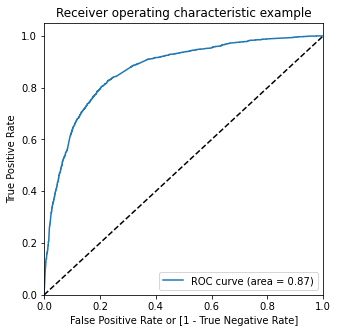

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## 9. Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.268628,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.278859,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.360974,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.854945,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.228672,3934,0,1,1,1,0,0,0,0,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.573902  0.972830  0.328086
0.2   0.2  0.720934  0.916464  0.600450
0.3   0.3  0.792517  0.828062  0.770615
0.4   0.4  0.801330  0.758313  0.827836
0.5   0.5  0.803185  0.681671  0.878061
0.6   0.6  0.780767  0.556772  0.918791
0.7   0.7  0.764069  0.474453  0.942529
0.8   0.8  0.738559  0.372668  0.964018
0.9   0.9  0.678726  0.178021  0.987256


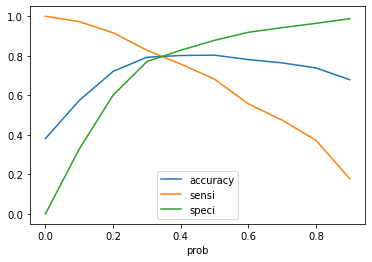

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.268628,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.278859,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.360974,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.854945,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.228672,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7985466914038343

In [144]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3183,  819],
       [ 484, 1982]])

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8037307380373074

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.795352323838081

In [148]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20464767616191903


In [149]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7076044269903606


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8680119989091901


### Precision and Recall


In [151]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3514,  488],
       [ 785, 1681]])

##### Precision
TP / TP + FP

In [152]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7750115260488705

##### Recall
TP / TP + FN

In [153]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6816707218167072

### Precision and recall tradeoff

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

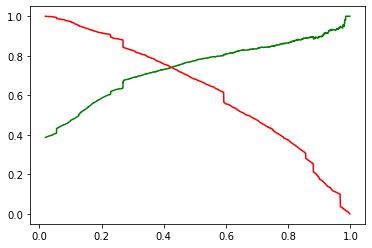

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [158]:
col6

Index(['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website',
       'Do Not Email', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

## 10. Making predictions on the test set

In [159]:
X_test = X_test[col6]
X_test.head()

,Page Views Per Visit,TotalVisits,Total Time Spent on Website,Do Not Email,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Origin_Lead Add Form,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4269,1.000000,0.727273,0.444982,0,0,0,0,0,0,0,0,0,1
2376,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,1
7766,0.833333,0.454545,0.025968,0,0,1,0,1,0,0,0,1,0
9199,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,1,0,0
4359,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0


In [160]:
X_test_sm = sm.add_constant(X_test)

### Making Predictions

In [161]:
y_test_pred = res.predict(X_test_sm)

In [162]:
y_test_pred[:10]

4269    0.773229
2376    0.966857
7766    0.124354
9199    0.054882
4359    0.880588
9186    0.620849
1631    0.490463
8963    0.227053
8007    0.098234
5324    0.423805
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.head()

,0
4269,0.773229
2376,0.966857
7766,0.124354
9199,0.054882
4359,0.880588


In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [166]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [167]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [169]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.773229
1,1,2376,0.966857
2,1,7766,0.124354
3,0,9199,0.054882
4,1,4359,0.880588


In [170]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [171]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Conversion_Prob'], axis=1)

In [172]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,1,4269,0.773229
1,1,2376,0.966857
2,1,7766,0.124354
3,0,9199,0.054882
4,1,4359,0.880588


In [173]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [174]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,1,4269,0.773229,1
1,1,2376,0.966857,1
2,1,7766,0.124354,0
3,0,9199,0.054882,0
4,1,4359,0.880588,1


## 11. Evaluation

In [175]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
CT=checking_test_df['final_predicted'].value_counts()
CT

1    877
0    218
Name: final_predicted, dtype: int64

In [176]:
CT[1]/(CT[1]+CT[0])

0.8009132420091324

### Conversion Rate - 80%

In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7997835497835498

In [178]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1340,  337],
       [ 218,  877]])

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009132420091324

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.7990459153249851

In [182]:
from sklearn.metrics import precision_score, recall_score
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7224052718286655
recall  0.8009132420091324


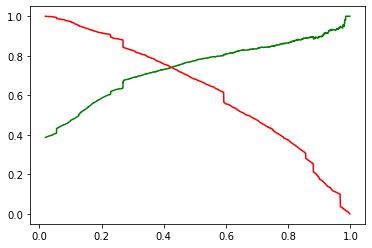

In [183]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [184]:
col6

Index(['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website',
       'Do Not Email', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

## Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 80% and 80% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Hence overall this model seems to be good.  